In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Setting a random seed for reproducibility np.random.seed(42)
# Number of pieces 
num_pieces = 200
# Generating semi-random lead times (in days)
# Lead time observed
lead_time_observed = np.random.randint(5, 50, size=num_pieces)
lead_time_observed

array([ 8,  8, 28, 29, 43, 10, 34, 23, 32, 33,  7, 43, 36, 18, 22, 28, 13,
       43, 29, 16, 36, 44,  8, 17, 44, 25, 18, 25, 20, 21, 49, 49, 10, 23,
        5, 14, 48, 25, 22, 47, 30, 43, 11, 12, 11, 25,  6, 41, 12,  9, 49,
       18, 15, 33, 15, 29, 19, 28, 49, 33, 37, 24,  6, 49, 12, 41, 14, 12,
       39, 38, 21,  8, 34, 28,  5, 40, 31, 14, 48, 29, 19, 18, 16, 39,  7,
       10, 41,  8,  8, 31, 21, 20, 41, 35, 47, 36, 12, 30, 49, 31, 23, 25,
       16, 31, 15,  9,  9, 37, 17, 41, 34, 28, 30, 11, 32, 24, 28, 40, 38,
       23, 15, 44,  6, 32, 41, 44, 35, 35, 40, 35, 29, 34, 33, 26,  6, 19,
       14, 46, 19, 15,  7, 18, 37, 41, 44, 12, 44, 36, 49, 41, 26, 19, 27,
       48, 43, 40,  8, 47, 14, 21, 31, 32, 31, 29, 10, 20, 17,  9, 12, 34,
       45, 35,  7, 11, 45, 31, 48, 29, 21, 49, 17, 39, 10, 47, 11, 34, 39,
       16,  8, 43, 49, 11, 19, 15, 39, 19, 19, 30, 14, 11])

In [7]:
# Lead time theoretical
lead_time_theoretical = lead_time_observed + np.random.randint(-10, 15, size=num_pieces)
lead_time_theoretical 

array([-1,  3, 42, 38, 51,  4, 34, 15, 37, 33,  7, 54, 42, 27, 22, 35,  4,
       37, 29, 11, 38, 48,  1, 29, 42, 18,  8, 38, 19, 28, 47, 53, 20, 31,
       -4,  4, 40, 19, 24, 58, 44, 54, 19, 19, 19, 18,  1, 44, 19, -1, 50,
       21, 27, 43, 24, 21, 33, 34, 47, 36, 34, 25, 14, 57, 17, 50,  6, 11,
       38, 31, 20, 12, 30, 24, -3, 40, 26, 11, 61, 35, 12, 26, 28, 52, 11,
        5, 43, 19, 17, 39, 28, 20, 47, 25, 58, 44, 20, 26, 60, 24, 34, 20,
       21, 37, 23,  1, 15, 34, 14, 37, 33, 18, 41, 15, 29, 25, 35, 51, 48,
       29, 27, 43,  8, 40, 31, 57, 29, 31, 36, 29, 31, 36, 27, 37, 13, 19,
        9, 49, 22,  8, 15, 31, 34, 50, 40,  5, 49, 47, 41, 38, 34, 10, 21,
       58, 40, 54,  4, 46,  6, 22, 27, 42, 24, 40,  7, 28, 20, 21, 18, 42,
       41, 49,  8, 11, 47, 29, 39, 25, 18, 57, 19, 45,  5, 41, 20, 40, 40,
       11,  2, 51, 47, 25, 22, 21, 53,  9, 31, 31, 28,  7])

In [8]:
# Creating a DataFrame 
data={
'Piece': range(1, num_pieces + 1), 'LeadTimeObserved': lead_time_observed, 'LeadTimeTheoretical': lead_time_theoretical
}
data

{'Piece': range(1, 201),
 'LeadTimeObserved': array([ 8,  8, 28, 29, 43, 10, 34, 23, 32, 33,  7, 43, 36, 18, 22, 28, 13,
        43, 29, 16, 36, 44,  8, 17, 44, 25, 18, 25, 20, 21, 49, 49, 10, 23,
         5, 14, 48, 25, 22, 47, 30, 43, 11, 12, 11, 25,  6, 41, 12,  9, 49,
        18, 15, 33, 15, 29, 19, 28, 49, 33, 37, 24,  6, 49, 12, 41, 14, 12,
        39, 38, 21,  8, 34, 28,  5, 40, 31, 14, 48, 29, 19, 18, 16, 39,  7,
        10, 41,  8,  8, 31, 21, 20, 41, 35, 47, 36, 12, 30, 49, 31, 23, 25,
        16, 31, 15,  9,  9, 37, 17, 41, 34, 28, 30, 11, 32, 24, 28, 40, 38,
        23, 15, 44,  6, 32, 41, 44, 35, 35, 40, 35, 29, 34, 33, 26,  6, 19,
        14, 46, 19, 15,  7, 18, 37, 41, 44, 12, 44, 36, 49, 41, 26, 19, 27,
        48, 43, 40,  8, 47, 14, 21, 31, 32, 31, 29, 10, 20, 17,  9, 12, 34,
        45, 35,  7, 11, 45, 31, 48, 29, 21, 49, 17, 39, 10, 47, 11, 34, 39,
        16,  8, 43, 49, 11, 19, 15, 39, 19, 19, 30, 14, 11]),
 'LeadTimeTheoretical': array([-1,  3, 42, 38, 51,  4, 34

In [9]:
df = pd.DataFrame(data)
df

,Piece,LeadTimeObserved,LeadTimeTheoretical
0,1,8,-1
1,2,8,3
2,3,28,42
3,4,29,38
4,5,43,51
...,...,...,...
195,196,19,9
196,197,19,31
197,198,30,31
198,199,14,28


In [10]:
# Calculate percentage deviation
df['DeviationPercent'] = ((df['LeadTimeTheoretical'] - df['LeadTimeObserved']) / df['LeadTimeObserved']) * 100
df

,Piece,LeadTimeObserved,LeadTimeTheoretical,DeviationPercent
0,1,8,-1,-112.500000
1,2,8,3,-62.500000
2,3,28,42,50.000000
3,4,29,38,31.034483
4,5,43,51,18.604651
...,...,...,...,...
195,196,19,9,-52.631579
196,197,19,31,63.157895
197,198,30,31,3.333333
198,199,14,28,100.000000


In [12]:
# Define deviation bins
bins = [-np.inf, -30, -20, -10, 0, 10, 20, 30, np.inf]
bins

[-inf, -30, -20, -10, 0, 10, 20, 30, inf]

In [13]:
labels = ['<-30%', '-30% to -20%', '-20% to -10%', '-10% to 0%', '0% to 10%', '10% to 20%', '20% to 30%', '>30%']
labels

['<-30%',
 '-30% to -20%',
 '-20% to -10%',
 '-10% to 0%',
 '0% to 10%',
 '10% to 20%',
 '20% to 30%',
 '>30%']

In [14]:
df['DeviationCategory'] = pd.cut(df['DeviationPercent'], bins=bins, labels=labels)
df

,Piece,LeadTimeObserved,LeadTimeTheoretical,DeviationPercent,DeviationCategory
0,1,8,-1,-112.500000,<-30%
1,2,8,3,-62.500000,<-30%
2,3,28,42,50.000000,>30%
3,4,29,38,31.034483,>30%
4,5,43,51,18.604651,10% to 20%
...,...,...,...,...,...
195,196,19,9,-52.631579,<-30%
196,197,19,31,63.157895,>30%
197,198,30,31,3.333333,0% to 10%
198,199,14,28,100.000000,>30%


In [15]:
# Count the number of pieces in each category
deviation_counts = df['DeviationCategory'].value_counts().sort_index()
deviation_counts

DeviationCategory
<-30%           30
-30% to -20%    11
-20% to -10%    19
-10% to 0%      30
0% to 10%       17
10% to 20%      17
20% to 30%      21
>30%            55
Name: count, dtype: int64

In [16]:
plt.figure(figsize=(14, 8))
plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.11/site-packages/matplotlib/pyplot.py'>

<Figure size 1400x800 with 0 Axes>

<BarContainer object of 8 artists>

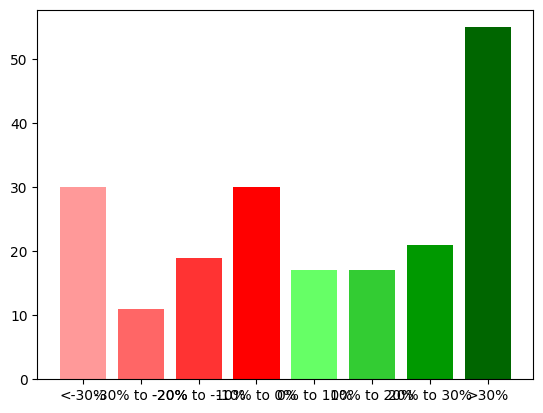

In [17]:
bars = plt.bar(deviation_counts.index, deviation_counts.values, color=['#FF9999', '#FF6666', '#FF3333', '#FF0000', '#66FF66', '#33CC33', '#009900', '#006600'])
bars

In [21]:
# Adding text on bars for bar in bars:
yval = bars.get_height()
plt.text(bars.get_x() + bars.get_width() / 2, yval, int(yval), va='bottom', ha='center')
# Customizing the plot
plt.xlabel('Deviation Category')
plt.ylabel('Number of Pieces')
plt.title('Deviation between Theoretical and Observed Lead Times') 
plt.grid(axis='y')
# Display the plot 
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

In [ ]:
# Displaying the DataFrame to the user
import ace_tools as tools; 
tools.display_dataframe_to_user(name="Lead Time Analysis Data", dataframe=df) 
### Explication